<a href="https://colab.research.google.com/github/Sankarlal-MyGH/StockMarketPredictionLSTM/blob/main/StockMarketPredictionUsingStackedLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import the libraries
### Data Collection
import pandas_datareader as pdr
key="ab4381851842b240cfca5c57f6d3d7cfb4db281c"

In [20]:
df = pdr.get_data_tiingo('ADBE', api_key=key)


In [21]:
df.tail()

close     high  ...  divCash  splitFactor
symbol date                                        ...                      
ADBE   2021-10-06 00:00:00+00:00  570.31  572.155  ...      0.0          1.0
       2021-10-07 00:00:00+00:00  578.96  586.145  ...      0.0          1.0
       2021-10-08 00:00:00+00:00  576.86  583.610  ...      0.0          1.0
       2021-10-11 00:00:00+00:00  573.07  582.280  ...      0.0          1.0
       2021-10-12 00:00:00+00:00  580.69  584.220  ...      0.0          1.0

[5 rows x 12 columns]

In [22]:
df.to_csv('ADBE.csv')

In [23]:
import pandas as pd

In [56]:
df=pd.read_csv('ADBE.csv')

In [57]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,ADBE,2016-10-13 00:00:00+00:00,108.01,108.1269,106.53,107.13,1588510,108.01,108.1269,106.53,107.13,1588510,0.0,1.0
1,ADBE,2016-10-14 00:00:00+00:00,107.84,109.1000,107.82,108.19,1968363,107.84,109.1000,107.82,108.19,1968363,0.0,1.0
2,ADBE,2016-10-17 00:00:00+00:00,107.49,108.2800,107.39,108.00,1136503,107.49,108.2800,107.39,108.00,1136503,0.0,1.0
3,ADBE,2016-10-18 00:00:00+00:00,108.42,108.8200,108.01,108.44,1318965,108.42,108.8200,108.01,108.44,1318965,0.0,1.0
4,ADBE,2016-10-19 00:00:00+00:00,108.39,108.8900,108.15,108.81,1282176,108.39,108.8900,108.15,108.81,1282176,0.0,1.0


In [58]:
#reset the index and take out close column
df1=df.reset_index()['close']

In [59]:
df1.shape

(1258,)

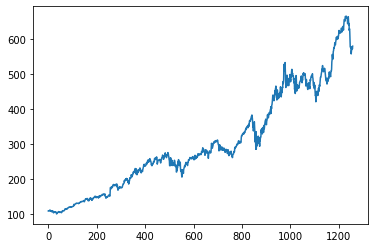

In [60]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [61]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [62]:
df1

array([[0.01498907],
       [0.01468929],
       [0.01407209],
       ...,
       [0.84176836],
       [0.835085  ],
       [0.84852225]])

In [63]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
training_size, test_size

(817, 441)

In [64]:
print(df1[0:training_size,:].shape)
print(df1[training_size:len(df1),:1].shape)

(817, 1)
(441, 1)


In [65]:

##splitting dataset into train and test split
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [66]:
len(train_data)

817

In [82]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [83]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [84]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)